## Import

In [1]:
from sklearn.datasets import load_iris, load_diabetes
from sklearn.model_selection import train_test_split
# Импортируем линейную регрессию
from sklearn.linear_model import LinearRegression
# Импортируем метрики качества MAPE и MSE
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
# Импортируем логистическую регрессию
from sklearn.linear_model import LogisticRegression
# Импортируем метрики качества accuracy, precision и recall
from sklearn.metrics import accuracy_score, precision_score, recall_score
# Импортируем SVM
from sklearn.svm import SVC
# Импортируем функцию бэггинга
from sklearn.ensemble import BaggingRegressor
# Импортируем функцию стэкинга
from sklearn.ensemble import StackingClassifier
# Импортируем еще классификатор knn
from sklearn.neighbors import KNeighborsClassifier

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Data

In [2]:
# Загружаем данные при помощи функции load_diabetes
data = load_diabetes()
# load_diabetes возвращает словарь. Давайте посмотрим, что является ключами
print(data)

# Вытаскиваем признаки и метки
X_diabetes = pd.DataFrame(data['data'], columns=data['feature_names'])
y_diabetes = data['target']

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]]), 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
  

In [3]:
# Загружаем данные при помощи функции load_iris
data = load_iris()

# load_iris возвращает словарь. Давайте посмотрим, что является ключами
print(data)

# Вытаскиваем признаки и метки
X_iris = pd.DataFrame(data['data'], columns=data['feature_names'])
y_iris = data['target']

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [4]:
X_diabetes.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [5]:
X_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


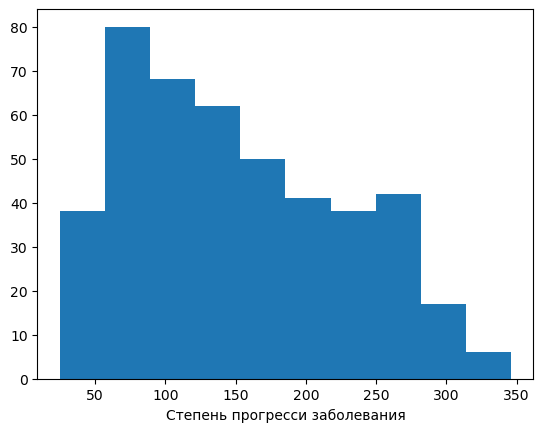

In [6]:
plt.hist(y_diabetes)
plt.xlabel("Степень прогресси заболевания")
plt.show()

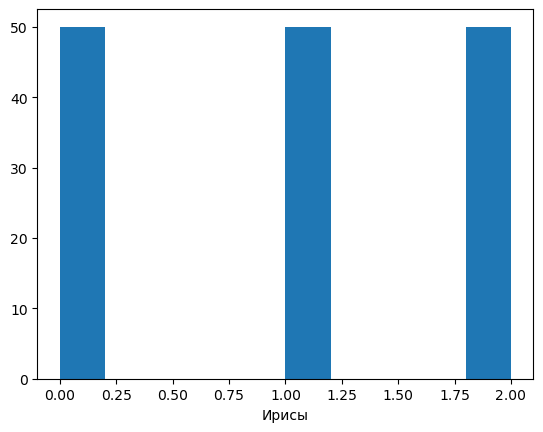

In [7]:
# Посмотрим на таргетный столбец

plt.hist(y_iris)
plt.xlabel("Ирисы")
plt.show()

#### EDA

#### Functions

#### Encoding

#### Relationship

## Model

#### Train Test Split

In [8]:
# Разобьем данные на обучение и тест
RANDOM_STATE = 2

X_diabetes_train, X_diabetes_test, y_diabetes_train, y_diabetes_test = train_test_split(X_diabetes, y_diabetes, test_size=0.3, random_state=RANDOM_STATE)

In [9]:
# Для наглядности, нам было бы удобнее решать бинарную задачу c не идеально разделяющимися классами,
# поэтому предлагаем оставить только versicolor(1) и virginica(2)
condition = (y_iris == 1) | (y_iris == 2)
y_iris = y_iris[condition]
X_iris = X_iris[condition]

y_iris[y_iris == 2] = 0

In [10]:
# Разобьем данные на обучение и тест

X_iris_train, X_iris_test, y_iris_train, y_iris_test = train_test_split(X_iris, y_iris, test_size=0.3, random_state=RANDOM_STATE)

#### Linear Regression

In [11]:
# Создаем модель линейной регрессии
model_lr = LinearRegression()

# Обучаем ее на тренировочной части датасета Diabetes
model_lr.fit(X_diabetes_train, y_diabetes_train)

LinearRegression()

w0, w1, w2, ...

In [12]:
# w_1, w_2, ...
print(model_lr.coef_)
# w_0
print(model_lr.intercept_)

[ -31.80406415 -214.66452697  445.14791885  376.34786891 -802.50380919
  525.99207358  106.4287134   172.3171033   799.50335529   57.1646797 ]
152.6275795791894


In [13]:
# Посмотрим на качество работы нашего алгоритма на тестивых и тренировочных данных
y_diabetes_pred_train = model_lr.predict(X_diabetes_train)
y_diabetes_pred_test = model_lr.predict(X_diabetes_test)

print("MAPE")
print(f"Train: {mean_absolute_percentage_error(y_diabetes_train, y_diabetes_pred_train)}")
print(f"Test:  {mean_absolute_percentage_error(y_diabetes_test, y_diabetes_pred_test)}")
print("RMSE")
print(f"Train: {mean_squared_error(y_diabetes_train, y_diabetes_pred_train) ** 0.5}")
print(f"Test:  {mean_squared_error(y_diabetes_test, y_diabetes_pred_test) ** 0.5}")

MAPE
Train: 0.40271499375736075
Test:  0.3581480205026922
RMSE
Train: 53.481768986337414
Test:  54.03495068132986


#### Logistic Regression

In [14]:
# Создаем модель линейной регрессии
model_logr = LogisticRegression()

# Обучаем ее на тренировочной части датасета Iris
model_logr.fit(X_iris_train, y_iris_train)
y_iris_train_pred = model_logr.predict(X_iris_train)
y_iris_test_pred = model_logr.predict(X_iris_test)

In [15]:
# Посмотрим на качество работы нашего алгоритма на тестивых и тренировочных данных

print("Accuracy")
print(f"Train: {accuracy_score(y_iris_train, y_iris_train_pred)}")
print(f"Test:  {accuracy_score(y_iris_test, y_iris_test_pred)}")
print("Precision")
print(f"Train: {precision_score(y_iris_train, y_iris_train_pred)}")
print(f"Test:  {precision_score(y_iris_test, y_iris_test_pred)}")
print("Recall")
print(f"Train: {recall_score(y_iris_train, y_iris_train_pred)}")
print(f"Test:  {recall_score(y_iris_test, y_iris_test_pred)}")

Accuracy
Train: 0.9571428571428572
Test:  0.9
Precision
Train: 0.9393939393939394
Test:  0.8947368421052632
Recall
Train: 0.96875
Test:  0.9444444444444444


#### SVC

In [16]:
# Создаем модель линейной регрессии
model_svm = SVC()

# Обучаем ее на тренировочной части датасета Iris
model_svm.fit(X_iris_train, y_iris_train)
y_iris_train_pred = model_svm.predict(X_iris_train)
y_iris_test_pred = model_svm.predict(X_iris_test)

In [17]:
# Посмотрим на качество работы нашего алгоритма на тестивых и тренировочных данных

print("Accuracy")
print(f"Train: {accuracy_score(y_iris_train, y_iris_train_pred)}")
print(f"Test:  {accuracy_score(y_iris_test, y_iris_test_pred)}")
print("Precision")
print(f"Train: {precision_score(y_iris_train, y_iris_train_pred)}")
print(f"Test:  {precision_score(y_iris_test, y_iris_test_pred)}")
print("Recall")
print(f"Train: {recall_score(y_iris_train, y_iris_train_pred)}")
print(f"Test:  {recall_score(y_iris_test, y_iris_test_pred)}")

Accuracy
Train: 0.9571428571428572
Test:  0.9333333333333333
Precision
Train: 0.967741935483871
Test:  0.9444444444444444
Recall
Train: 0.9375
Test:  0.9444444444444444


#### Bagging

In [18]:
# Создаем модель бэггинга с базовой моделью линейной регрессии и 5 моделями (n_estimators=5)
bagging_model = BaggingRegressor(LinearRegression(), n_estimators=10)

# Обучаем ее на тренировочной части датасета Diabetes
bagging_model.fit(X_diabetes_train, y_diabetes_train)

y_diabetes_pred_train = bagging_model.predict(X_diabetes_train)
y_diabetes_pred_test = bagging_model.predict(X_diabetes_test)

In [19]:
# Посмотрим на качество работы нашего алгоритма на тестивых и тренировочных данных

print("MAPE")
print(f"Train: {mean_absolute_percentage_error(y_diabetes_train, y_diabetes_pred_train)}")
print(f"Test:  {mean_absolute_percentage_error(y_diabetes_test, y_diabetes_pred_test)}")
print("RMSE")
print(f"Train: {mean_squared_error(y_diabetes_train, y_diabetes_pred_train) ** 0.5}")
print(f"Test:  {mean_squared_error(y_diabetes_test, y_diabetes_pred_test) ** 0.5}")

MAPE
Train: 0.4034657411493564
Test:  0.35430556249592743
RMSE
Train: 53.67471250156861
Test:  54.02132717837576


#### Stacking

In [20]:
estimators = [
     ('LogReg', LogisticRegression()),
     ('SVM', SVC()),
     ('KNN', KNeighborsClassifier(n_neighbors=3))
]

# Создаем модель стэкинга с моделями из estimators и финальной моделью логистической регрессией
stacking_model = StackingClassifier(estimators, final_estimator=KNeighborsClassifier(), cv=3)

# Обучаем ее на тренировочной части датасета Diabetes
stacking_model.fit(X_iris_train, y_iris_train)
y_iris_train_pred = stacking_model.predict(X_iris_train)
y_iris_test_pred = stacking_model.predict(X_iris_test)

In [21]:
# Посмотрим на качество работы нашего алгоритма на тестивых и тренировочных данных

print("Accuracy")
print(f"Train: {accuracy_score(y_iris_train, y_iris_train_pred)}")
print(f"Test:  {accuracy_score(y_iris_test, y_iris_test_pred)}")
print("Precision")
print(f"Train: {precision_score(y_iris_train, y_iris_train_pred)}")
print(f"Test:  {precision_score(y_iris_test, y_iris_test_pred)}")
print("Recall")
print(f"Train: {recall_score(y_iris_train, y_iris_train_pred)}")
print(f"Test:  {recall_score(y_iris_test, y_iris_test_pred)}")

Accuracy
Train: 0.9571428571428572
Test:  0.9333333333333333
Precision
Train: 0.967741935483871
Test:  0.9444444444444444
Recall
Train: 0.9375
Test:  0.9444444444444444
